# Strategic Advertising in E-learning – Targeting the Most Promising Markets

## Table of Contents

- [1. Understanding the Data](#1.-Understanding-the-Data)
- [2. Checking for Sample Representativity](#2.-Checking-for-Sample-Representativity)
- [3. Exploring New Coders by Location and Density](#3.-Exploring-New-Coders-by-Location-and-Density)
- [4. Exploring New Coders' Spending](#4.-Exploring-New-Coders'-Spending)
- [5. Dealing with Extreme Outliers](#5.-Dealing-with-Extreme-Outliers)
- [6. Selecting the Two Best Markets for Advertising](#6.-Selecting-the-Two-Best-Markets-for-Advertising)
- [7. Conclusion](#7.-Conclusion)

## 1. Understanding the Data

Let's assume that we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains like data science, game development, etc. We want to promote our product and invest some money in advertisement. In this project, our goal is to find out the two best markets (countries) to advertise our product in.

To reach our goal, we could organize surveys for a couple of different markets to find out which would be the best choices for advertising. This is very costly, however, and it's a good call to explore cheaper options first.

We can search for existing data that might be relevant for our purpose. One good candidate is the data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969). [freeCodeCamp](https://www.freecodecamp.org/) is a free e-learning platform that offers courses on web development. Because they run a popular [Medium publication](https://www.freecodecamp.org/news/), their survey attracted new coders with varying interests (not only web development), which is ideal for the purpose of our analysis.

Note that the survey data we'll use is publicly available in this [GitHub repository](https://github.com/freeCodeCamp/2017-new-coder-survey).

In [1]:
# Import the relevant libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set the maximum number of columns displayed in a DataFrame to 150
pd.options.display.max_columns = 150

# Define the direct link to the dataset, then read in the data
direct_link = 'https://raw.githubusercontent.com/freeCodeCamp/2017-new-coder-survey/master\
/clean-data/2017-fCC-New-Coders-Survey-Data.csv'
fcc = pd.read_csv(direct_link, low_memory=0)

# Print the shape and the first few rows of the DataFrame
print(fcc.shape)
fcc.head(3)

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

The dataset contains `18,175` rows and `136` columns, indicating a comprehensive survey with a wide range of questions. The rows show data about respondents' demographics, education, employment status, and preferences in the tech industry.

The data also includes various categories such as bootcamp attendance, city population, commute time, programming languages, job interests, and income. This extensive dataset allows for a detailed analysis of the experiences and preferences of new coders.

## 2. Checking for Sample Representativity

For the purpose of our analysis, we want to answer questions about a **population** of new coders that are interested in the subjects we teach. We'd like to know:

- The locations of these new coders.
- The locations with the greatest number of new coders.
- How much money new coders are willing to spend on learning.

Before starting to analyze the sample data we have, we need to clarify whether it's representative for our population of interest, and has the right categories of people for our purpose. The `JobRoleInterest` column describes for every participant the role(s) they'd be interested in working.

If a participant is interested in working in a certain field, it means that they're also interested in learning about it. So let's take a look at the frequency distribution table of `JobRoleInterest`, and determine whether the data we have is relevant.

In [2]:
# Display the percentage distribution of values in 'JobRoleInterest'
(fcc['JobRoleInterest'].value_counts(normalize=True) * 100).head(10)

JobRoleInterest
Full-Stack Web Developer                               11.770595
  Front-End Web Developer                               6.435927
  Data Scientist                                        2.173913
Back-End Web Developer                                  2.030892
  Mobile Developer                                      1.673341
Game Developer                                          1.630435
Information Security                                    1.315789
Full-Stack Web Developer,   Front-End Web Developer     0.915332
  Front-End Web Developer, Full-Stack Web Developer     0.800915
  Product Manager                                       0.786613
Name: proportion, dtype: float64

The information in the table above is quite granular, but from a quick scan, it looks like:

- A lot of people are interested in web development (i.e. `full-stack`, `front-end` and `back-end web development`).
- A few people are interested in `data science`, `mobile development`, and other domains.

It's noteworthy that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests. Consequently, we'll:

- Split each string in the `JobRoleInterest` column to find the number of interests for each participant. First, we'll drop the null values because we can't split `NaNs`.
- Generate a frequency table for the variable describing the number of interests.

In [3]:
# Remove null values and split each string in the 'JobRoleInterest' column
interests_split = fcc['JobRoleInterest'].dropna()
interests_split = interests_split.str.split(',')

# Calculate the frequency distribution for the number of interests
interests_number = interests_split.apply(len)
interests_number.value_counts(normalize=True).sort_index() * 100

JobRoleInterest
1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: proportion, dtype: float64

It turns out that only `31.65%` of the participants have a clear idea about the exact programming niche they'd like to work in, while the rest of students have mixed interests. Given that our company offers courses on various subjects, the fact that new coders have mixed interests might be actually beneficial for us.

Since the focus of our courses is mainly on web and mobile development, let's find out the percentage of respondents who have chosen at least one of these two options.

In [4]:
# Check if 'JobRoleInterest' contains "Web Developer" or "Mobile Developer" and drop missing values
web_mobile = fcc['JobRoleInterest'].dropna().str.contains('Web Developer|Mobile Developer')

# Calculate the percentage distribution of web or mobile development interests
web_mobile_dist = web_mobile.value_counts(normalize=True) * 100
web_mobile_dist

JobRoleInterest
True     86.241419
False    13.758581
Name: proportion, dtype: float64

After omitting missing values, the data indicates that `86.24%` of respondents are interested in roles as either web developers or mobile developers, while only `13.76%` are interested in other roles. Next, let's visualize this difference using a bar chart.

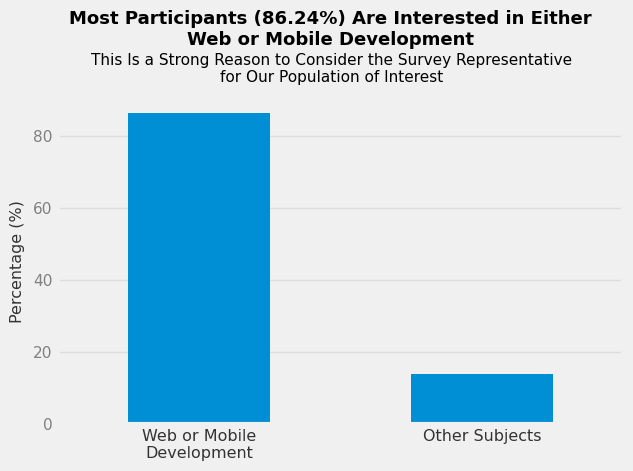

In [5]:
# Set the plot style and size, then plot the frequency table as a bar chart
plt.style.use('fivethirtyeight')
plt.figure(figsize=[6.5, 4])
web_mobile_dist.plot.bar()

# Add a main title and a subtitle
plt.suptitle('Most Participants (86.24%) Are Interested in Either\nWeb or Mobile Development',
             x=0.5, y=1.105, size=13, ha='center', weight='bold')
plt.title('This Is a Strong Reason to Consider the Survey Representative\n\
for Our Population of Interest', x=0.485, y=1.03, size=11, ha='center')

# Set plot limits, ticks, labels, and customize gridlines
plt.ylim([0, 90])
plt.yticks(color='grey', fontsize=11)
plt.xticks(ticks=[0, 1], labels=['Web or Mobile\nDevelopment', 'Other Subjects'], c='#333333',
           fontsize=11.5, rotation=0)
plt.ylabel('Percentage (%)', c='#333333', fontsize=11.5, labelpad=6)
plt.xlabel('')
plt.grid(alpha=0.5)
plt.grid(alpha=0, axis='x')

# Display the plot
plt.show()

We observe that most people who participated in the survey (`86.24%`) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches, but mainly in web or mobile development.

## 3. Exploring New Coders by Location and Density

To analyze our sample, we can start with finding out where the new coders are located, and the densities (how many coders there are) for each location. For our analysis, we'll work with the `CountryLive` variable because we're interested where people live at the moment we run the ads.

Because the dataset provides information at a country level, we can think of each country as an individual market. One indicator of a good market is the number of potential customers – the more potential customers in a market, the better. For instance, if our ads manage to convince `10%` of `5,000` potential customers in `Market A` to buy our product, it's greater than convincing `90%` of `30` potential customers in `Market B`.

To ensure we're working with a representative sample, we'll drop all the rows where participants didn't answer what role they are interested to work in.

In [6]:
# Filter the DataFrame to include only rows where 'JobRoleInterest' is not null
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Calculate absolute and relative frequencies for each unique country
country_counts = fcc_good['CountryLive'].value_counts()
country_percentages = fcc_good['CountryLive'].value_counts(normalize=True) * 100

# Display a DataFrame containing the frequencies
country_frequencies = pd.DataFrame(data={'Absolute Frequency': country_counts,
                                         'Percentage Frequency': country_percentages.round(2)})
country_frequencies.head(10)

,Absolute Frequency,Percentage Frequency
CountryLive,,
United States of America,3125,45.70
India,528,7.72
United Kingdom,315,4.61
Canada,260,3.80
Poland,131,1.92
Brazil,129,1.89
Germany,125,1.83
Australia,112,1.64
Russia,102,1.49


We notice that `45.7%` of our potential customers are located in the `USA`; this country definitely seems like the most interesting. `India` has the second customer density, but it's only `7.7%`, which is not too far from the `UK` (`4.6%`) or `Canada` (`3.8%`).

Although this information is useful, we need to go more in depth and find how much money new coders are willing to spend on learning. Advertising in high-density markets where most students are only willing to learn for free is extremely unlikely to be profitable for us.

## 4. Exploring New Coders' Spending

The `MoneyForLearning` column presents in American dollars the amount of money the participants had spent from the moment they started coding until they completed the survey. Since our company sells subscriptions at a price of `$59` per month, we're interested in finding out how much money each student spends per month.

It also seems a good idea to narrow down our analysis to only four countries: the `USA`, the `UK`, `India`, and `Canada`. Two reasons for this decision are:

- These are the countries having the highest frequencies in our sample, which means we have a decent amount of data for each.
- Our courses are written in English, and it is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

Note that some students answered that they had been learning to code for `0` months; it might be that they had just started learning when they completed the survey.

In [7]:
# Replace 0s with 1s in the 'MonthsProgramming' column to avoid division by zero
fcc_good['MonthsProgramming'].replace(0, 1, inplace=True)

# Calculate the amount of money each student spent per month, and the number of null values
fcc_good['MoneyPerMonth'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['MoneyPerMonth'].isnull().sum()

675

In [8]:
# Filter out rows with non-null values in the 'MoneyPerMonth' column
fcc_good = fcc_good[fcc_good['MoneyPerMonth'].notnull()]
fcc_good.head(3)

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.333333
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,software development and IT,NaN,Employed for wages,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,25.0,14f1863afa9c7de488050b82eb3edd96,21ba173828fbe9e27ccebaf4d5166a55,13000.0,1.0,0.0,0.0,0.0,Within 7 to 12 months,1.0,NaN,NaN,1.0,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,work for a medium-sized company,1.0,"Front-End Web Developer, Back-End Web Develo...",no preference,Spanish,"single, never married",1000.0,5.0,2ed189768e,2017-03-09 00:37:58,2017-03-09 00:33:53,2017-03-09 00:40:14,2017-03-09 00:38:02,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,Codenewbie,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,high school diploma or e

We want to group the data by country to measure the average amount of money students spent per month in each country. First, let's remove the rows containing null values in `CountryLive`, then check whether we still have enough data for our countries of interest.

In [9]:
# Filter out rows with non-null values in the 'CountryLive' column
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Display the frequency distribution of the top 10 countries
fcc_good['CountryLive'].value_counts().head(10)

CountryLive
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Germany                      114
Brazil                       111
Australia                    102
Ukraine                       79
Russia                        79
Name: count, dtype: int64

Obviously, the `USA` has the highest number of respondents, with `2,933` entries. Other countries with notable representation include `India`, the `UK`, and `Canada`. This distribution indicates a significant concentration of respondents from the `USA`, with a steep drop-off in the number of respondents from other countries.

Next, we're going to compute the mean amount each student spent per month in each country.

In [10]:
# Select numeric columns, then add 'CountryLive' to the DataFrame
fcc_good_numeric = fcc_good.select_dtypes(include=['number'])
fcc_good_numeric['CountryLive'] = fcc_good['CountryLive']

# Group by country and calculate the mean values for numeric columns
country_means = fcc_good_numeric.groupby('CountryLive').mean()

# Extract the mean amount each student spent per month for specific countries
country_means['MoneyPerMonth'][['United States of America', 'India',
                                'United Kingdom', 'Canada']].sort_values(ascending=False)

CountryLive
United States of America    227.997996
India                       135.100982
Canada                      113.510961
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

The results for the `UK` and `Canada` are a bit surprising compared to the value we see for `India`. If we considered a few socio-economical metrics such as [GDP per capita](https://en.wikipedia.org/wiki/List_of_countries_by_GDP_(PPP)_per_capita#Lists_of_countries_and_dependencies), we'd intuitively expect new coders in the `UK` and `Canada` to spend more on learning than people in `India`.

Perhaps we don't have enough representative data for the `UK` and `Canada`, or we have some outliers making the mean amount too large for `India`, or too low for both the `UK` and `Canada`. Apart from these possibilities, the results may be accurate.

## 5. Dealing with Extreme Outliers

To spot outliers, we'll visualize for our countries of interest (the `USA`, the `UK`, `India`, `Canada`) the distribution of the variable `MoneyPerMonth`. The latter describes how much money each participant spent per month.

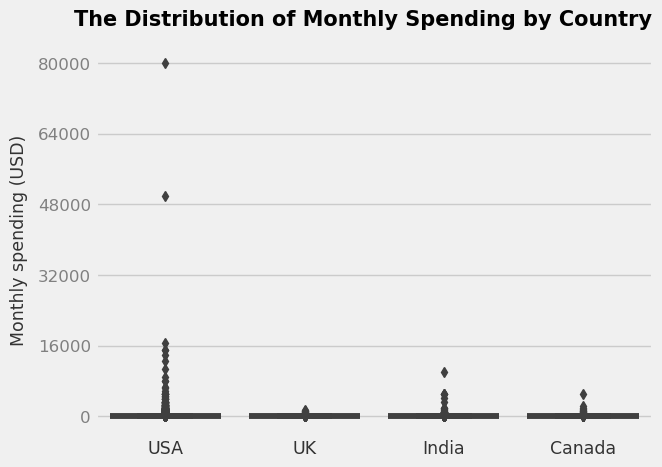

In [11]:
# Include only data for USA, UK, India, and Canada
countries = fcc_good[fcc_good['CountryLive'].str.contains(
    r'United States of America|United Kingdom|Canada|India')]

# Create a boxplot for the distribution of monthly spending for each country
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=countries)

# Set the title of the plot
plt.title('The Distribution of Monthly Spending by Country',
          x=0.48, y=1.03, fontsize=15, fontweight='bold')

# Set custom x-axis tick labels, and remove the x-axis label
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'], c='#333333', size=12.5)
plt.xlabel('')

# Set y-axis tick locations and labels, and the label for the y-axis
plt.yticks(range(0, 96000, 16000), c='grey', size=12)
plt.ylabel('Monthly spending (USD)', c='#333333', labelpad=7, size=12.5)

# Display the plot
plt.show()

In this plot, it's hard to determine if there's anything wrong with the data for the `UK`, `Canada`, or `India`. However, in the `USA`, two students spend each month at least `50,000 USD` in learning.

Since this seems highly unlikely, we'll remove every value that goes over `20,000 USD` in the `MoneyPerMonth` column, then visualize again the distribution of monthly spending for each country.

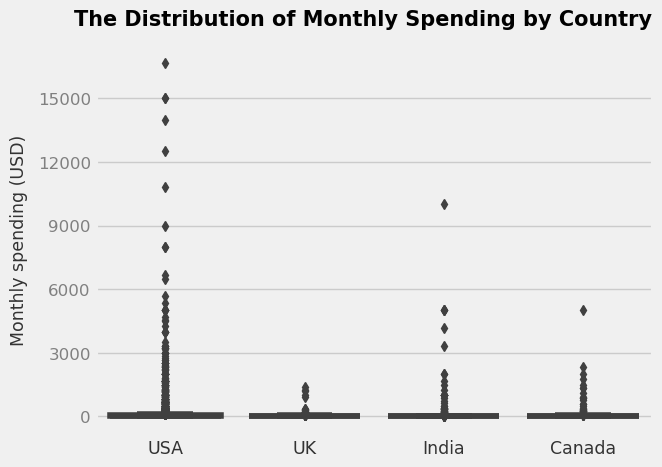

In [12]:
# Isolate participants who spend less than $20000 per month
fcc_good = fcc_good[fcc_good['MoneyPerMonth'] < 20000]

# Select numeric columns, then add 'CountryLive' to the DataFrame
fcc_good_numeric = fcc_good.select_dtypes(include=['number'])
fcc_good_numeric['CountryLive'] = fcc_good['CountryLive']

# Group by country and calculate the mean values for numeric columns
country_means = fcc_good_numeric.groupby('CountryLive').mean()


# Include only data for USA, UK, India, and Canada
countries = fcc_good[fcc_good['CountryLive'].str.contains(
    'United States of America|United Kingdom|Canada|India')]

# Create a boxplot for the distribution of monthly spending for each country
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=countries)

# Set the title of the plot
plt.title('The Distribution of Monthly Spending by Country',
          x=0.48, y=1.03, fontsize=15, fontweight='bold')

# Set custom x-axis tick labels, and remove the x-axis label
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'], c='#333333', size=12.5)
plt.xlabel('')

# Set y-axis tick locations and labels, and the label for the y-axis
plt.yticks(range(0, 18000, 3000), c='grey', size=12)
plt.ylabel('Monthly spending (USD)', c='#333333', labelpad=7, size=12.5)

# Display the plot
plt.show()

We notice a few outliers for `India` – values over `$2,500` per month, but it's unclear whether this data is accurate. Perhaps these students attended several bootcamps, which tend to be very expensive. Therefore, we're going to examine these data points to see if we can discover anything relevant.

In [13]:
# Inspect the outliers for India
india_outliers = countries[(countries['CountryLive'] == 'India') & 
                           (countries['MoneyPerMonth'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,

We can see that no participant from `India` attended a bootcamp. Overall, it's hard to know whether these new coders truly spent large amounts on learning. One question from the survey was the following: `"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"`.

It's possible the participants misunderstood the question and thought that university tuition is included. Anyway, it's safer to remove the rows containing the outliers.

In [14]:
# Remove the outliers for India
countries = countries.drop(india_outliers.index)

In the box plot above, we can also see more outliers for the `USA` – values over `$6,000` per month. Therefore, we're going to examine these data points in more detail.

In [15]:
# Inspect the outliers for the USA
usa_outliers = countries[(countries['CountryLive'] == 'United States of America') &
                         (countries['MoneyPerMonth'] >= 6000)]
usa_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

Out of these `11` outliers, `6` people attended bootcamps, which justifies the large sums of money they spent on learning. For the other `5` people, it's hard to determine from the data how they spent large amounts. Consequently, we'll remove rows where participants reported that they spend at least `$6,000` each month, but didn't attend a bootcamp.

Furthermore, `8` respondents had been programming for no more than `3` months when they completed the survey. They most likely paid a large sum of money on a bootcamp that was going to last for several months. So, the `MoneyPerMonth` values are unrealistic and should be significantly lower because the students probably didn't pay anything after the first month.

As a result, we'll remove respondents who didn't attend a bootcamp, as well as those who had been programming for `3` months or less at the time they completed the survey.

In [16]:
# Remove respondents from USA who didn't attend a bootcamp and spend at least $6,000 each month
no_bootcamp_usa = countries[
    (countries['CountryLive'] == 'United States of America') &
    (countries['MoneyPerMonth'] >= 6000) &
    (countries['AttendedBootcamp'] == 0)]

countries = countries.drop(no_bootcamp_usa.index)

# Remove respondents from USA who had been programming for 3 months or less,
# and spend at least $6,000 each month
three_months_usa = countries[
    (countries['CountryLive'] == 'United States of America') &
    (countries['MoneyPerMonth'] >= 6000) &
    (countries['MonthsProgramming'] <= 3)]

countries = countries.drop(three_months_usa.index)

Looking again at the last box plot, we notice an outlier for `Canada` – a person who spends roughly `$5,000` per month. So let's examine this person in more depth.

In [17]:
# Examine the outliers for Canada
canada_outliers = countries[(countries['CountryLive'] == 'Canada') &
                            (countries['MoneyPerMonth'] > 4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,MoneyPerMonth
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


This outlier is similar to some in the `USA` – this participant had been programming for no more than `2` months when he or she completed the survey. It seems they paid a large amount of money in the beginning to enroll in a bootcamp, and then very likely didn't pay anything in the following months. Therefore, we'll take the same approach as previously and remove this outlier.

In [18]:
# Remove the outliers for Canada
countries = countries.drop(canada_outliers.index)

# Select numeric columns, then add 'CountryLive' to the DataFrame
countries_numeric = countries.select_dtypes(include=['number'])
countries_numeric['CountryLive'] = countries['CountryLive']

# Group by country then extract their mean values
country_means = countries_numeric.groupby('CountryLive').mean()
country_means['MoneyPerMonth'].sort_values(ascending=False)

CountryLive
United States of America    142.654608
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
Name: MoneyPerMonth, dtype: float64

Next, we're going to visualize again the distribution of monthly spending for each country after addressing outliers for the `USA`, `Canada`, and `India`.

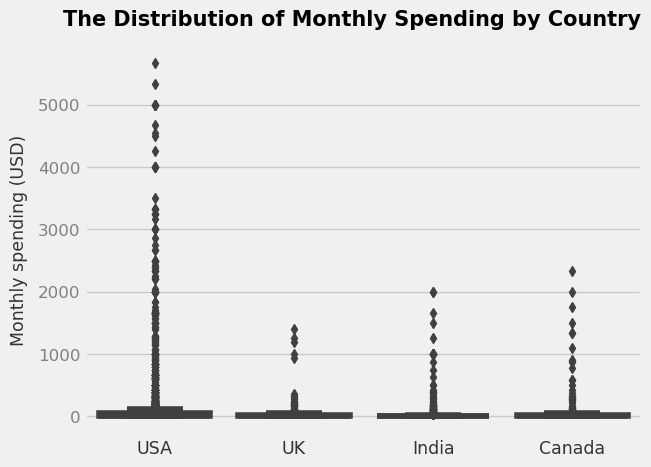

In [19]:
# Create a boxplot for the distribution of monthly spending for each country
sns.boxplot(y='MoneyPerMonth', x='CountryLive', data=countries)

# Set the title of the plot
plt.title('The Distribution of Monthly Spending by Country',
          x=0.48, y=1.03, fontsize=15, fontweight='bold')

# Set custom x-axis tick labels, and remove the x-axis label
plt.xticks(range(4), ['USA', 'UK', 'India', 'Canada'], c='#333333', size=12.5)
plt.xlabel('')

# Set y-axis tick locations and labels, and the label for the y-axis
plt.yticks(range(0, 6000, 1000), c='grey', size=12)
plt.ylabel('Monthly spending (USD)', c='#333333', labelpad=7, size=12.5)

# Display the plot
plt.show()

After addressing the outliers, the average monthly spending of the participants from the `USA`, `Canada`, and `India` significantly decreased, while the average of those from `UK` remained the same. This adjustment indicates that the initial high average monthly values were truly influenced by extreme outliers, providing a more accurate representation of typical spending.

## 6. Selecting the Two Best Markets for Advertising

Obviously, one country we should advertise in is the `USA`, as many new coders live there and are willing to pay a good amount of money per month (roughly `$143`).

Our e-learning company sells subscriptions at a price of `59 USD` per month. New coders in `Canada` are willing to pay roughly `93 USD` per month, compared to `India` (`66 USD`) and the `UK` (`45 USD`).

Our data strongly suggests that we should avoid advertising in the `UK`. Since participants in `India` spend `66 USD` per month on average, a subscription priced at `$59` wouldn't seem unaffordable for them. Furthermore, we have almost twice as many potential customers in `India` as we have in `Canada`.

In [20]:
# Calculate the percentage distribution of potential customers in each market (country)
countries['CountryLive'].value_counts(normalize=True) * 100

CountryLive
United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: proportion, dtype: float64

It's not crystal clear whether we should deem `Canada` or `India` as the second best market. Although the participants in `Canada` pay more than those in `India`, the latter might be a better choice thanks to its larger number of potential customers.

So far, we can consider several options:

1. Advertise in the `USA`, `Canada`, and `India` by splitting the advertisement budget in various combinations:
    - `60%` for the USA, `15%` for Canada, `25%` for India.
    - `50%` for the USA, `20%` for Canada, `30%` for India; etc.<br><br>

2. Advertise only in the `USA` and `India`, or the `USA` and `Canada`. Again, we can split the advertisement budget unequally:
    - `70%` for the USA, and `30%` for India.
    - `65%` for the USA, and `35%` for Canada; etc.<br><br>

3. Advertise only in the `USA`.

Finally, it's better to share our analysis and insights with the marketing team, and let the team make a decision using their domain knowledge. They may also want to run some new surveys in `India` and `Canada`, which we can analyze in the future.

## 7. Conclusion

In this project, we assumed that we're working for an e-learning company that offers courses on programming, primarily in web and mobile development. We aim to promote our product and invest some money in advertising. Therefore, our goal was to identify the two best markets (countries) to advertise our product in. To achieve our goals, we used data from [freeCodeCamp's 2017 New Coder Survey](https://www.freecodecamp.org/news/we-asked-20-000-people-who-they-are-and-how-theyre-learning-to-code-fff5d668969), which attracted new coders with varying interests besides web development, making it ideal for our analysis.

Initially, the survey dataset contained `18,175` rows and `136` columns, and included various categories such as bootcamp attendance, programming languages, and job interests. For our analysis, we wanted to answer questions about a population of new coders interested in the subjects we teach. Hence, we needed to clarify whether the survey data is representative of our population of interest.

In the dataset, we found that many new coders are interested in web development, and a few are interested in data science, mobile development, and other domains. Furthermore, only `31.65%` of the respondents have a clear idea about the exact programming niche they'd like to work in. On the other hand, the rest have mixed interests, which might actually be beneficial for us.

After we visualized the percentage distribution of web or mobile development interests, we observed that most people who participated in the survey (`86.24%`) are interested in either web or mobile development, while only `13.76%` are interested in other roles. This gave us a strong reason to consider our sample representative of our population of interest.

To analyze our sample, we started by finding out where the new coders are located and the densities for each location. To ensure the representativeness of our sample, we dropped all the rows where participants didn’t answer what role they are interested in working in. Additionally, we are interested only in where people live at the moment we run the ads. One indicator of a good market is the number of potential customers.

We learned that `45.7%` of our potential customers are located in the `USA`; `India` has the second highest customer density at `7.7%`, which is not too far from the `UK` (`4.6%`) or `Canada` (`3.8%`). Since our company sells subscriptions at a price of `$59` per month, we wanted to find out how much money each student spends per month on average. We also narrowed down our analysis to only the `USA`, the `UK`, `India`, and `Canada`. Advertising in high-density markets where most students are only willing to learn for free is extremely unlikely to be profitable for us.

Next, we grouped the data by country. The `USA` has the highest number of respondents, with `2,933` entries. Other countries with notable representation include `India`, the `UK`, and `Canada`. After computing the mean amount each student spent per month in each country, the results for the `UK` and `Canada` were a bit surprising compared to the value we saw for `India`. We intuitively expected new coders in the `UK` and `Canada` to spend more on learning than those in `India`.

When we visualized the distribution of monthly spending for each country of interest after addressing outliers for the `USA`, `Canada`, and `India`, the average monthly spending of the participants from the three countries significantly decreased, while the average for the `UK` remained the same. This adjustment indicates that the initial high average monthly values were influenced by extreme outliers, providing a more accurate representation of typical spending.

Finally, we came up with several options for which countries we could advertise in. By advertising in different country combinations, we can split the advertisement budget in various ways as well. Moreover, we decided it’s better to share our analysis and insights with the marketing team and let them make a decision using their domain knowledge.